# Analysis on sponsors of videos, from the classified domains from domains_analysis.

In [59]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [5]:
PATH_METADATAS_TOP_COUNTS_SRC = "../data/domains_classification.csv"

In [8]:
domains_top_classified = pd.read_csv(PATH_METADATAS_TOP_COUNTS_SRC)
domains_top_classified.domain_category = domains_top_classified.domain_category.astype("category")
domains_top_classified.is_sponsored = domains_top_classified.is_sponsored.astype(bool)

In [10]:
domains_top_classified.head(20)

,domain,count,median_sponsor_score,is_sponsored,domain_category
0,plus.google.com,3786647,3.0,False,Social Media
1,play.google.com,2093786,4.0,True,Application
2,itunes.apple.com,1724603,3.0,False,Music
3,bit.ly,1408414,3.0,False,Shorten
4,tinyurl.com,1380122,4.0,False,Shorten
5,rstyle.me,1175073,11.0,True,Agency
6,steamcommunity.com,824573,3.0,False,Video Game
7,creativecommons.org,767740,4.0,False,Education
8,smarturl.it,750397,3.0,False,Shorten
9,po.st,739548,4.0,True,Agency


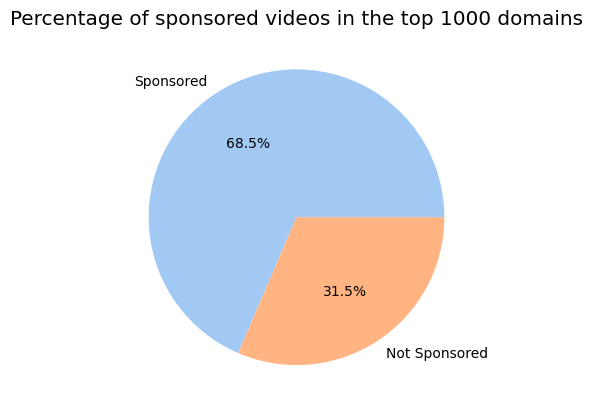

In [40]:
domains_count = domains_top_classified.groupby("is_sponsored")["count"].agg(["sum"]).values.reshape(-1,)

colors = sns.color_palette('pastel')
plt.title('Percentage of sponsored videos in the top 1000 domains')
plt.pie(domains_count, labels=["Sponsored", "Not Sponsored"], autopct="%1.1f%%", colors=colors)
plt.show()

We can see that, compared to [the domains analysis](../analysis/domains_analysis.ipynb), the proportion of sponsored videos is the total inverse of the proportion of sponsoring domains ($27\%$ of sponsoring domains v.s. $68.5\%$ of sponsored videos).

In [41]:
sp_domains = domains_top_classified[domains_top_classified.is_sponsored]
nsp_domains = domains_top_classified[~domains_top_classified.is_sponsored]

In [95]:
# Count the number of videos containing a link of a specific category
classified_sp_domains_cnt = sp_domains.groupby("domain_category")["count"].sum().sort_values(ascending=False)[:10]
classified_nsp_domains_cnt = nsp_domains.groupby("domain_category")["count"].sum().sort_values(ascending=False)[:10]

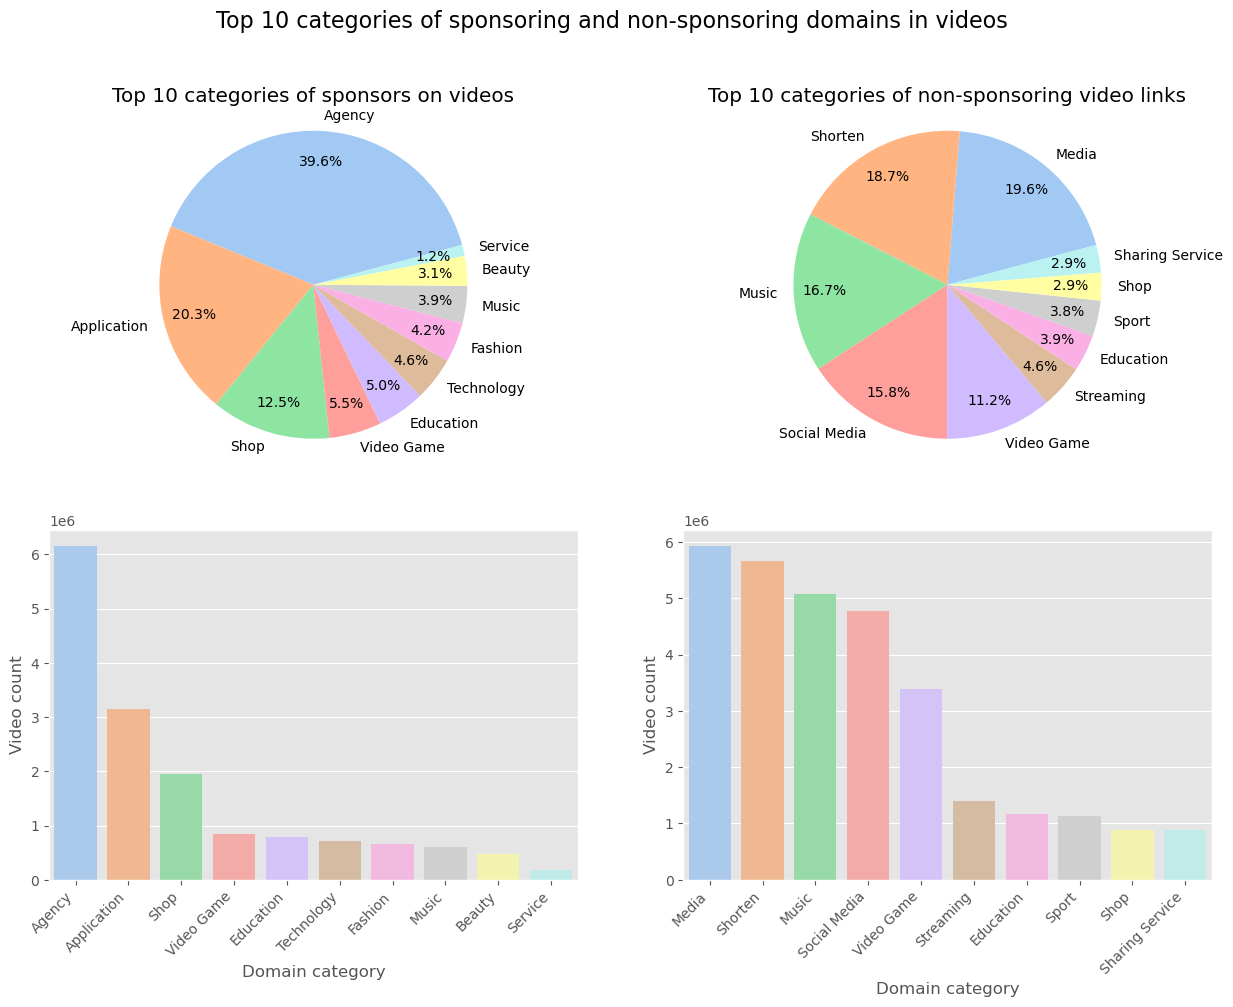

In [129]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle("Top 10 categories of sponsoring and non-sponsoring domains in videos", fontsize=16)

ax1.set_title("Top 10 categories of sponsors on videos")
ax1.pie(classified_sp_domains_cnt, labels=classified_sp_domains_cnt.index, autopct="%1.1f%%", colors=colors, radius=1.1, pctdistance=0.8, startangle=15)

ax2.set_title("Top 10 categories of non-sponsoring video links")
ax2.pie(classified_nsp_domains_cnt, labels=classified_nsp_domains_cnt.index, autopct="%1.1f%%", colors=colors, radius=1.1, pctdistance=0.8, startangle=15)

sns.barplot(x=classified_sp_domains_cnt.reset_index()["domain_category"].to_numpy(), y=classified_sp_domains_cnt, ax=ax3, palette=colors)
ax3.set(xlabel='Domain category', ylabel='Video count')
plt.setp(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')

sns.barplot(x=classified_nsp_domains_cnt.reset_index()["domain_category"].to_numpy(), y=classified_nsp_domains_cnt, ax=ax4, palette=colors)
ax4.set(xlabel='Domain category', ylabel='Video count')
plt.setp(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Compared to the plots found in [the domains analysis](../analysis/domains_analysis.ipynb), we can see that the `Agency` category of domains is the one that occurs in the most videos and by a significant amount. Hence, we have discovered something ! Mainly that videos are in general sponsored by sponsoring agencies rather than products or services.